To get at least 100000 samples with N=100 and therefore 4950 samples per run, 21 runs have to be performed and 103950 samples will be generated in total.


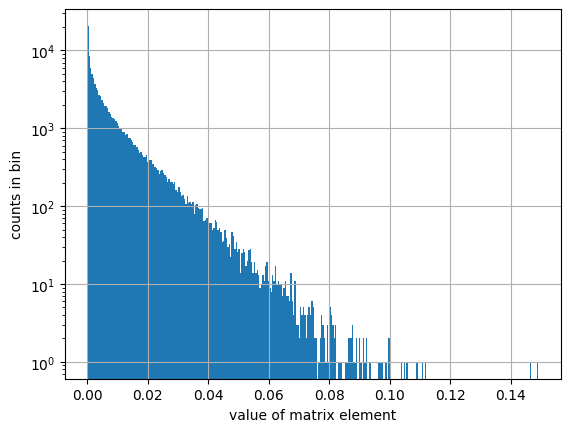

In [1]:
import numpy as np
from scipy.stats import uniform_direction
import matplotlib.pyplot as plt

from telecom import generate_signal, get_couplings

def main():
    # ------ Parameters --------
    N = 100               # number of users
    M = 70               # length of id-sequence for every user
    K = 10             # number of antennas
    xi = 0              # std of thermal noise
    min_samples = 100000    # minimum number of samples from which the histogram should be computed
    density_in_histogram = 0    # if 1, the histogram is normalized such that it is like the probability density function

    # ------- Program ----------
    
    # activity pattern
    alpha = np.zeros(N)
    alpha[0] = 1
        
    # generate many J and record the entries  
    samples_per_run = int(N*(N-1)/2)
    repeat = int(np.ceil(min_samples/samples_per_run))
    N_total_matrix_elements = repeat*samples_per_run
    matrix_elements = np.zeros(N_total_matrix_elements)
    print(f"To get at least {min_samples} samples with N={N} and therefore {samples_per_run} samples per run, {repeat} runs have to be performed and {repeat*samples_per_run} samples will be generated in total.")

    for i in range(repeat):
        P = uniform_direction.rvs(dim=M, size=N).transpose()
        Y = generate_signal(alpha, P, xi, K)
        J, b = get_couplings(Y, P)
        matrix_elements[i*samples_per_run:(i+1)*samples_per_run] = J[np.triu_indices(n=N, k=1)]
    
    
    # ---------- plotting ---------

    plt.hist(np.abs(matrix_elements), bins=int(np.sqrt(N_total_matrix_elements)), density=density_in_histogram)
    plt.grid()
    #plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("value of matrix element")
    if density_in_histogram == 0:
        plt.ylabel("counts in bin")
    elif density_in_histogram == 1:
        plt.ylabel("probability density")
    else:
        print("invalid value for parameter density_in_histogram")
    plt.show()


if __name__ == "__main__":
    main()